# Convolutional neural networks for CIFAR100

In [1]:
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
import keras
from keras.datasets import cifar100
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, AveragePooling2D
from keras.constraints import max_norm
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from keras.models import load_model

import os

Using TensorFlow backend.


In [15]:
# Load the data: CIFAR100 with 20 class labels
(x_train_all, y_train_all), (x_test, y_test) = cifar100.load_data(label_mode='coarse')
num_classes = 20

# Convert class vectors to binary class matrices: we use the built-in Keras function for this
y_train_all = keras.utils.to_categorical(y_train_all, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

val_size = 6000
# make validation set
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, test_size=val_size, 
                                                              stratify = y_train_all, random_state = 1)
# let's take a subset of the training data first, for playing around
x_train_small = x_train[:10000]
y_train_small = y_train[:10000]

x_train_all = x_train_all.astype('float32')
x_train = x_train.astype('float32')
x_train_small = x_train_small.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')
x_train_all /= 255.0
x_train /= 255.0
x_train_small /= 255.0
x_val /= 255.0
x_test /= 255

# Labels
labels = [
'aquatic mammals',
'fish',
'flowers',
'food containers',
'fruit and vegetables',
'household electrical devices',
'household furniture',
'insects',
'large carnivores',
'large man-made outdoor things',
'large natural outdoor scenes',
'large omnivores and herbivores',
'medium-sized mammals',
'non-insect invertebrates',
'people',
'reptiles',
'small mammals',
'trees',
'vehicles 1',
'vehicles 2'
]

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_train_small.shape[0], 'small train samples')
print(x_val.shape[0], 'validation samples')
print(x_test.shape[0], 'test samples')

x_train shape: (44000, 32, 32, 3)
44000 train samples
10000 small train samples
6000 validation samples
10000 test samples


## Model after Step3 - Stage 1

In [9]:
test_model = Sequential()
#stack 1
test_model.add(Conv2D(96, (5, 5), padding='same',
                 input_shape=x_train.shape[1:]))
test_model.add(BatchNormalization())
test_model.add(Activation('relu'))
test_model.add(Conv2D(96, (5, 5), padding='same'))
test_model.add(BatchNormalization())
test_model.add(Activation('relu'))
test_model.add(MaxPooling2D(pool_size=(3, 3), strides = 2))
#test_model.add(Dropout(0.1))

#stack2
test_model.add(Conv2D(128, (5, 5), padding='same'))
test_model.add(BatchNormalization())
test_model.add(Activation('relu'))
test_model.add(Conv2D(128, (5, 5), padding='same'))
test_model.add(BatchNormalization())
test_model.add(Activation('relu'))
test_model.add(MaxPooling2D(pool_size=(3, 3), strides = 2))
#test_model.add(Dropout(0.2))

#stack3
test_model.add(Conv2D(256, (5, 5), padding='same'))
test_model.add(BatchNormalization())
test_model.add(Activation('relu'))
test_model.add(Conv2D(256, (5, 5), padding='same'))
test_model.add(BatchNormalization())
test_model.add(Activation('relu'))
test_model.add(MaxPooling2D(pool_size=(3, 3), strides = 2))
#test_model.add(Dropout(0.2))

test_model.add(Flatten())
test_model.add(Dense(1024))
test_model.add(Activation('relu'))
#test_model.add(Dropout(0.5))
test_model.add(Dense(1024))
test_model.add(Activation('relu'))
#test_model.add(Dropout(0.5))

#output
test_model.add(Dense(num_classes))
test_model.add(Activation('softmax'))

test_model.summary()

epochs = 100
batch_size = 512

Adam = keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0, amsgrad=False)
test_model.compile(loss='categorical_crossentropy',
              optimizer= Adam,
              metrics=['accuracy'])
filepath = 'step3_stage1.h5'

callbacks = [EarlyStopping(monitor='val_acc', patience=10),
             ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True)]

print('Not using data augmentation!')
history = test_model.fit(x_train_small, y_train_small,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_val, y_val),
          shuffle=True, callbacks = callbacks)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 96)        7296      
_________________________________________________________________
batch_normalization_13 (Batc (None, 32, 32, 96)        384       
_________________________________________________________________
activation_18 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 96)        230496    
_________________________________________________________________
batch_normalization_14 (Batc (None, 32, 32, 96)        384       
_________________________________________________________________
activation_19 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 96)        0         
__________

Epoch 20/100
10000/10000 [==============================] - 4s 364us/step - loss: 0.0057 - acc: 1.0000 - val_loss: 2.3798 - val_acc: 0.4257

Epoch 00020: val_acc did not improve from 0.42633
Epoch 21/100
10000/10000 [==============================] - 4s 364us/step - loss: 0.0052 - acc: 1.0000 - val_loss: 2.4131 - val_acc: 0.4250

Epoch 00021: val_acc did not improve from 0.42633
Epoch 22/100
10000/10000 [==============================] - 4s 363us/step - loss: 0.0047 - acc: 1.0000 - val_loss: 2.4194 - val_acc: 0.4273

Epoch 00022: val_acc improved from 0.42633 to 0.42733, saving model to step3_stage1.h5
Epoch 23/100
10000/10000 [==============================] - 4s 363us/step - loss: 0.0042 - acc: 1.0000 - val_loss: 2.4474 - val_acc: 0.4265

Epoch 00023: val_acc did not improve from 0.42733
Epoch 24/100
10000/10000 [==============================] - 4s 370us/step - loss: 0.0037 - acc: 1.0000 - val_loss: 2.4753 - val_acc: 0.4295

Epoch 00024: val_acc improved from 0.42733 to 0.42950, sav

6000/6000 [==============================] - 1s 224us/step
Training loss: 0.000668073431682 , training accuracy:  1.0
Validation loss: 2.80791947269 , validation accuracy:  0.431333333333


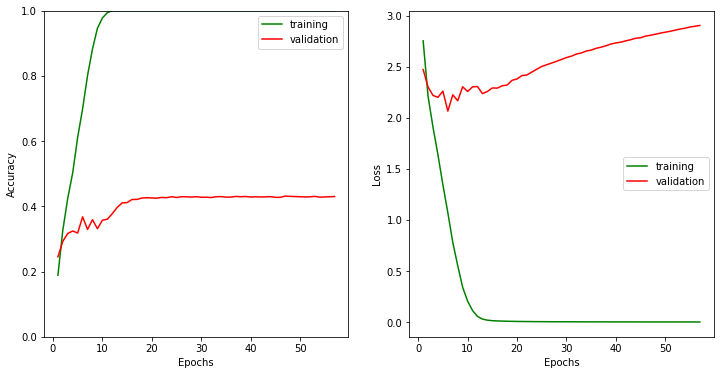

In [11]:
# Score trained model.
test_model.load_weights('step3_stage1.h5')
train_scores = test_model.evaluate(x_train_small, y_train_small, verbose=1)
val_scores = test_model.evaluate(x_val, y_val, verbose=1)

print('Training loss:', train_scores[0],', training accuracy: ',train_scores[1])
print('Validation loss:', val_scores[0],', validation accuracy: ',val_scores[1])

real_epochs = len(history.history['acc'])
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(np.arange(1,real_epochs+1,1),history.history['acc'],'g-',label='training')
plt.plot(np.arange(1,real_epochs+1,1),history.history['val_acc'],'r-',label='validation')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.ylim([0,1])
plt.legend()

# Note: loss is the loss function that is optimized for multi-class classification
# i.e. the multi-class version of cross-entropy error
plt.subplot(1,2,2)
plt.plot(np.arange(1,real_epochs+1,1),history.history['loss'],'g-',label='training')
plt.plot(np.arange(1,real_epochs+1,1),history.history['val_loss'],'r-',label='validation')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

Model is powerfull enough.

Learning convergence.

But heavily overfitting.